# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [9]:
# Libraries
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [10]:
# your code here

#create connection
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'employees'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

#what we want to have
engine = create_engine(connection_string)
query = 'SELECT * FROM employees'

#view the table
employees = pd.read_sql(query,engine)
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [16]:
# Method 1
# your code here
salary = employees.groupby(['Department']).mean()
salary

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [27]:
# Method 2
# your code here

salary_2 = pd.pivot_table(employees, values='Salary',index =['Department'], aggfunc=np.mean)

salary_2




,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [29]:
# your code here
salary_3 = pd.pivot_table(employees, values='Salary',index =['Department','Title'], aggfunc=np.mean)
salary_3


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [43]:
# your code here
salary_4 = pd.pivot_table(employees, values=['Salary'],index =['Title'],columns='Years',fill_value = 0)
salary_4



Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [41]:
# your code here

salary_5 = pd.pivot_table(employees, values=['Salary','Name'] ,index =['Department','Title'], aggfunc={'Salary' : np.mean,'Name' : 'count'})
salary_5




Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [47]:
# your code here

pd.pivot_table(employees, values=['Salary'] ,index =['Department','Title'], aggfunc=['median','max','min', np.std])





median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
your commments here

For the VP, they have the same value for the mean, max, min and std. 
The associate has the same result.

The std is nan because they have the same values for everything
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [53]:
# your code here
pd.pivot_table(employees, values=['Salary'] ,index =['Department','Title'], fill_value = 0 , aggfunc= {'Salary': ['median','max','min', np.std]})







Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [54]:
# your code here
pd.pivot_table(employees, values=['Salary','Name'],index =['Department'], aggfunc= {'Salary':'sum','Name':'count'})



,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [55]:
# your code here
pd.pivot_table(employees, values=['Salary','Years'],index =['Department','Title'], aggfunc= {'Salary':'mean','Years':'sum'})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [57]:
# your code here
#create connection
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'fitbit'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

#what we want to have
engine = create_engine(connection_string)
query = 'SELECT * FROM fitbit'

#view the table
fitbit = pd.read_sql(query,engine)
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [61]:
# your code here
#fitbit.info()
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [79]:
# your code here

fitbit.Steps.corr(fitbit['Minutes Very Active'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [66]:
import matplotlib.pyplot as plt;

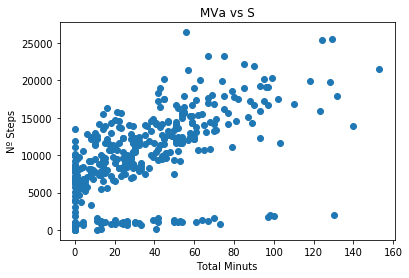

In [75]:

plt.scatter(fitbit['Minutes Very Active'] , fitbit['Steps'])
plt.title('MVa vs S')
plt.xlabel('Total Minuts')
plt.ylabel('Nº Steps')
plt.show()




#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here


Many of the points are located at the left of the plot, show a positive correlation. However, many points 
are at the lower part of the plot.

"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [78]:
# your code here
fitbit['Minutes Sedentary'] = fitbit['Minutes Sedentary'].astype('float')


fitbit.Steps.corr(fitbit['Minutes Sedentary'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

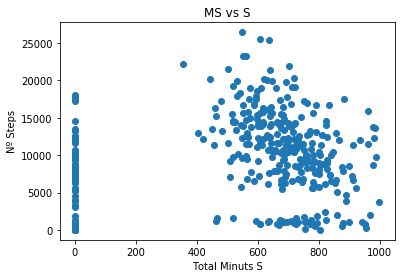

In [76]:
# your code here
plt.scatter(fitbit['Minutes Sedentary'] , fitbit['Steps'])
plt.title('MS vs S')
plt.xlabel('Total Minuts S')
plt.ylabel('Nº Steps')
plt.show()

In [ ]:
"""
your commments here

We observer there is not a correlation with the point, only a cloud of them and some are at the ylabel.


"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [80]:
# your code here

fitbit.Steps.corr(fitbit['MinutesOfSleep'])


0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

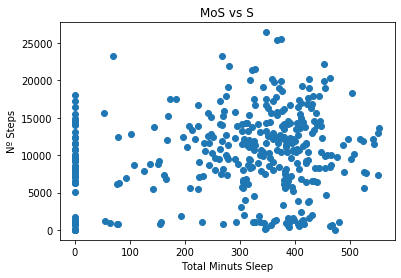

In [81]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'] , fitbit['Steps'])
plt.title('MoS vs S')
plt.xlabel('Total Minuts Sleep')
plt.ylabel('Nº Steps')
plt.show()


In [ ]:
"""
your commments here
There is not correlation between the two variable because we only see a cloud of points without 
a positive or negative relation.


"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [85]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [87]:
# your code here

cor_fit = fitbit[columns]
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [93]:
# your code here
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [94]:
# your code here

# your code here
#create connection
driver = 'mysql+pymysql'
ip = '34.65.10.136'
username = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
db = 'time_grades'
connection_string  = f'{driver}://{username}:{password}@{ip}/{db}'

#what we want to have
engine = create_engine(connection_string)
query = 'SELECT * FROM time_grades'

#view the table
time = pd.read_sql(query,engine)
time.head()



,Name,Study time,Grade
0,Jose,4,4\r
1,Maria,9,7\r
2,David,8,9\r
3,Sonia,10,7\r
4,Samuel,20,9\r


#### Show visually the frequency distribution of the `time_grades` dataset.

In [108]:
# your code here

# first erase the '\r' in Grade:
time['Grade']= time['Grade'].astype('str')

#Strip the '\r' caracters:
time['Grade'] = time['Grade'].map(lambda x: x.rstrip('\r'))


#Change type:
time['Grade']= time['Grade'].astype('float')


#Frequency:
time['Study time'].value_counts()

time['Grade'].value_counts()

7.0    4
9.0    3
8.0    2
3.0    2
2.0    1
1.0    1
5.0    1
4.0    1
Name: Grade, dtype: int64

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [109]:
# your code here
time.Grade.corr(time['Study time'])



0.7980456073578858

In [ ]:
"""
your commments here

There is a high positive corelation between both variables.
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

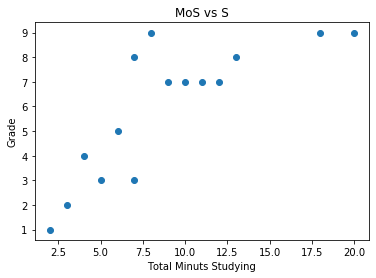

In [112]:
# your code here
plt.scatter(time['Study time'] , time['Grade'])
plt.title('MoS vs S')
plt.xlabel('Total Minuts Studying')
plt.ylabel('Grade')
plt.show()



In [ ]:
"""
your commments here


we can observe a positive tendency for the correlation, but there is nmot many points to really determine if 
the correlation is strong or not.

"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here

The Pearson correlation is the test statistics that measures the statistical relationship, or association, 
between two continuous variables.
The Spearman show the same but with only the values +1 or -1, not with decimal values. If there is no correlation, 
the output is the same for both parameters.

"""